In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1) [2.0 pts] Use os dados Breast Cancer Wisconsin (Diagnostic) Data Set do UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Use validação cruzada para avaliar qual dos algoritmos tem maior acurácia nos dados:
- SVM Linear
- SVM RBF  <br>
Decida que tipo de padronização (normalização) dos dados você usará para cada algoritmo (ou nenhuma). justifique.

In [109]:
data = pd.read_csv("./data/wdbc.csv", header=None)
print(data.shape)
data = data.drop(0, axis=1)
data.head()

(569, 32)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [110]:
X = data.iloc[:, 1:]
y = np.array(data.iloc[:,0].values)

In [111]:
for idx in range(len(y)):
    if y[idx]=="M":
        y[idx]=1
    elif y[idx]=="B":
        y[idx]=0

In [112]:
y = y.astype(int)

In [113]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear') #kernel lineal
score = cross_val_score(clf, X, y, n_jobs=2, cv=10)

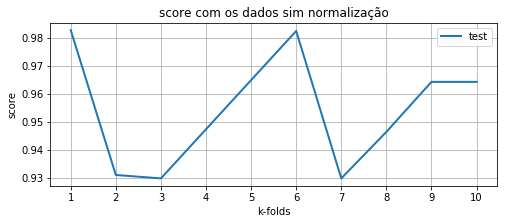

In [120]:
plt.figure(figsize=(8,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("score com os dados sim normalização")
plt.xlabel("k-folds")
plt.ylabel("score")
plt.plot(range(1,11), score, label="test", linewidth=2)
plt.legend();

In [71]:
score

array([0.97435897, 1.        , 0.89473684, 0.94736842, 0.89473684,
       0.94736842, 0.94736842, 0.97368421, 1.        , 0.92105263,
       0.97368421, 0.89473684, 0.97297297, 1.        , 0.94594595])

### Scalando os dados

In [115]:
def data_scale(df, l_cols=-1):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar, por defecto -1 para escalar todas
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    df_scale = df.copy()
    if l_cols == -1:
        l_cols = df.columns
    for col in l_cols:
        #se cambia cada columna
        df_scale[col] = (df_scale[col] - min(df_scale[col]))/(max(df_scale[col]) - min(df_scale[col]))
        #df[col] = (df[col] - min(df[col]))/((max(df[col]) - min(df[col])))
    return df_scale

In [93]:
data.columns

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [116]:
X = data_scale(X)

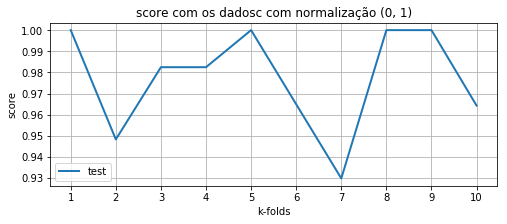

In [122]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear') #kernel lineal
score2 = cross_val_score(clf, X, y, n_jobs=2, cv=10)

plt.figure(figsize=(8,3))
plt.xticks(range(1,11), range(1,11))
plt.grid()
plt.title("score com os dadosc com normalização (0, 1)")
plt.xlabel("k-folds")
plt.ylabel("score")
plt.plot(range(1,11), score2, label="test", linewidth=2)
plt.legend();